In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# %matplotlib inline
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


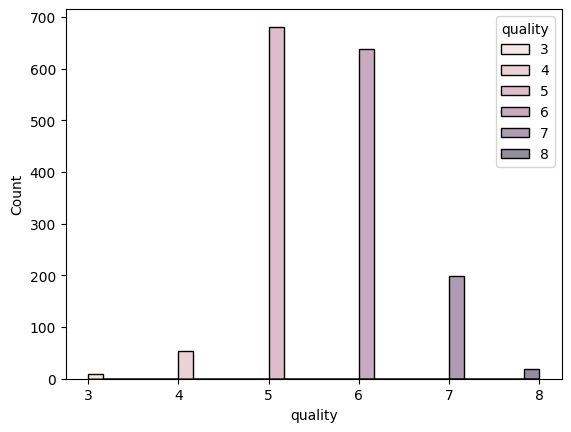

In [3]:
sns.histplot(data=red_wine, x="quality",hue='quality')
counts = red_wine['quality'].value_counts()

# Print the value counts
print(counts)

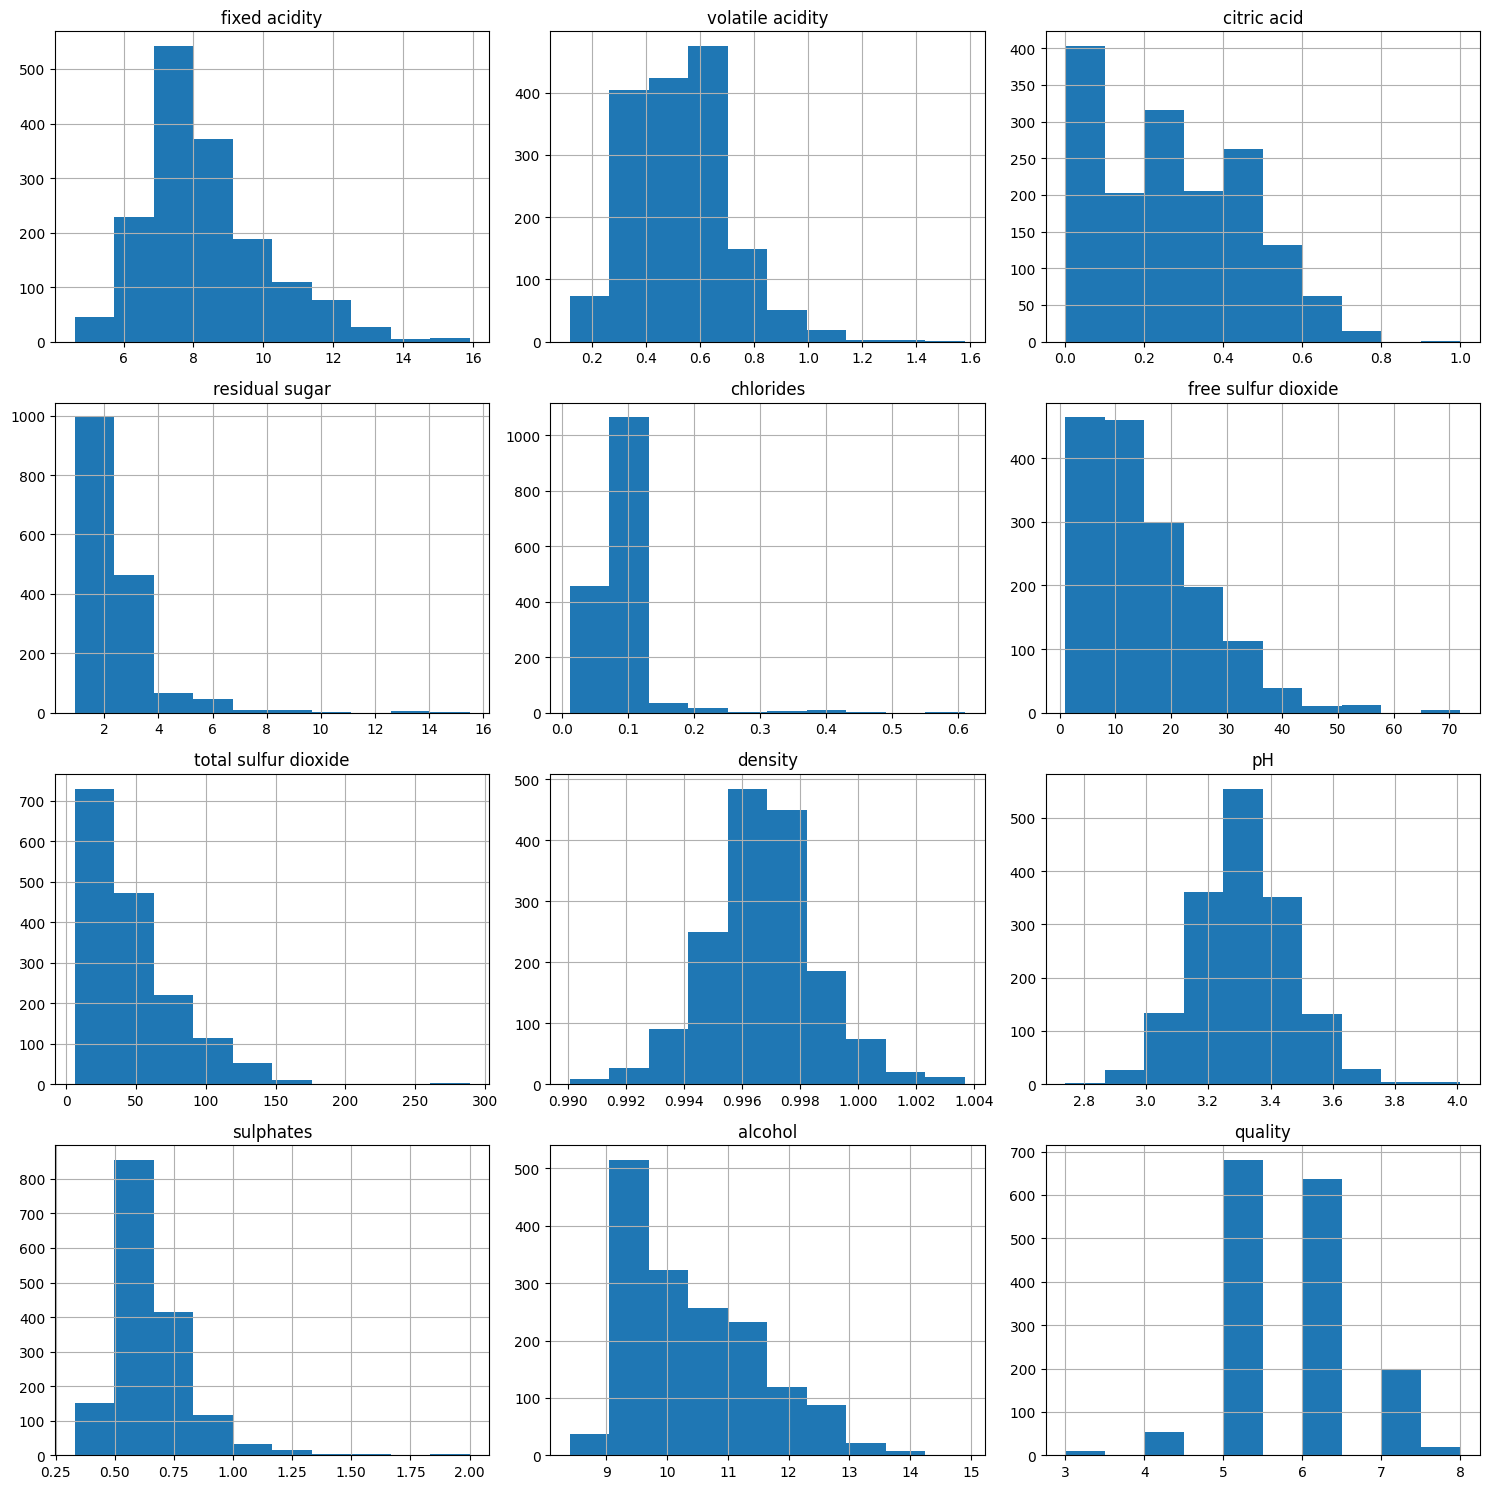

In [4]:
# Plot histograms for all features
red_wine.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

<Axes: >

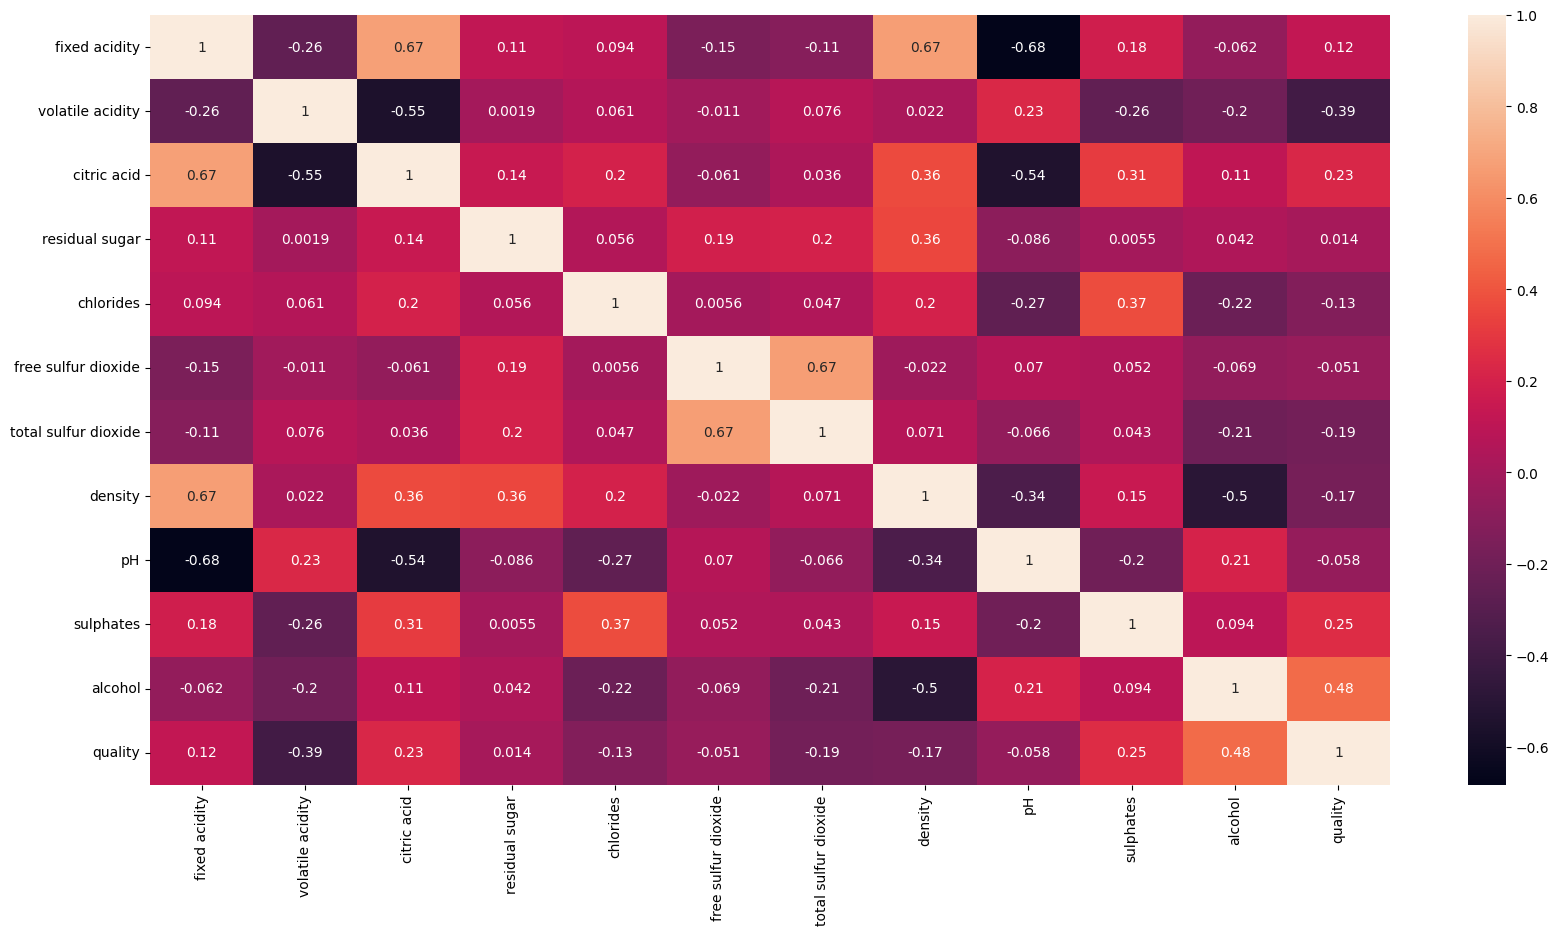

In [5]:
# check correlation among variables
corr = red_wine.corr()

# creat heatmap of correlation
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(corr, annot = True)

In [6]:
grade = [] #add column grade to classify the quality of the wine
for i in red_wine['quality']: 
    if i >= 7:
        i = 1
        grade.append(i)
    else:
        i = 0
        grade.append(i)
red_wine['grade'] = grade

In [7]:
# wine_data.drop('class', axis=1, inplace=True)

In [8]:
# red_wine.describe()

In [9]:
#convert data type to numeric
red_wine = red_wine.astype('float64')
red_wine['grade'] = red_wine['grade'].astype('int64')
data_X = red_wine.drop('grade', axis=1)
data_y = red_wine['grade']

In [10]:
# wine_data.shape

In [11]:
data_X.shape

(1599, 12)

In [12]:
data_y.shape

(1599,)

In [13]:
# wine_data

In [14]:
def train_test_split(X,y,test_size):
    test_size = 0.2
    train_size = 1 - float(test_size)
    total_rows = red_wine.shape[0]
    split =  int(total_rows * (train_size))
    X_train = data_X[0:split]
    X_test = data_X[split:]
    y_train = data_y[0:split]
    y_test = data_y[split:]
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

In [16]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [17]:
# implement Support Vector Machines
import numpy as np

class SVM:
    def __init__(self, learning_rate=10000, lambda_param=0.00001, num_iterations=100):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

In [18]:
svm_model = SVM()
svm_model.fit(X_train.to_numpy(), y_train.to_numpy())

In [19]:
svm_y_pred = svm_model.predict(X_test.to_numpy())
accuracy = np.mean(svm_y_pred == y_test)
print('Accuracy Score:', float(accuracy*100),"%")

Accuracy Score: 92.1875 %


In [47]:
# Predict using the trained SVM model
svm_y_pred = svm_model.predict(X_test.to_numpy())

# Map predicted labels back to original labels
svm_y_pred_mapped = np.where(svm_y_pred == 1, "GOOD", "BAD")  # Assuming 1 is mapped to good grade , and -1 is mapped to bad grade

# Print the predicted quality
print("Predicted quality of red wine:")
print(svm_y_pred_mapped)
print(len(svm_y_pred_mapped))

Predicted quality of red wine:
['BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD' 'BAD'
 'BAD' 'BAD' 'BAD' '

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(svm_y_pred, y_test)
cm_wine_data = pd.DataFrame(cm)
cm_wine_data.columns = ['Predict -1','Predict 1']
cm_wine_data = cm_wine_data.rename(index={0: 'Actual -1',1:'Actual 1'})
cm_wine_data

,Predict -1,Predict 1
Actual -1,295,25
Actual 1,0,0


In [51]:
# Future Predictions
new_redwine = red_wine.sample(5)
new_redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
1375,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9,5.0,-1
403,11.4,0.60,0.49,2.7,0.085,10.0,41.0,0.99940,3.15,0.63,10.5,6.0,-1
119,7.0,0.69,0.08,1.8,0.097,22.0,89.0,0.99590,3.34,0.54,9.2,6.0,-1
221,7.4,0.53,0.26,2.0,0.101,16.0,72.0,0.99570,3.15,0.57,9.4,5.0,-1
773,7.9,0.40,0.29,1.8,0.157,1.0,44.0,0.99730,3.30,0.92,9.5,6.0,-1


In [52]:
new_X = new_redwine.drop('grade', axis=1)

In [53]:
svm_y_pred_new = svm_model.predict(new_X)
svm_y_pred_mapped = np.where(svm_y_pred_new == 1, "GOOD", "BAD")
print("Predict: ", svm_y_pred_mapped)
new_redwine["quality_str"] = new_redwine["quality"].astype(str)
print("Actual: ",new_redwine["quality_str"].to_numpy())

Predict:  ['BAD' 'BAD' 'BAD' 'BAD' 'BAD']
Actual:  ['5.0' '6.0' '6.0' '5.0' '6.0']
